https://www.tensorflow.org/tutorials/keras/classification

In [179]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


pull data

In [180]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


display a training image and label

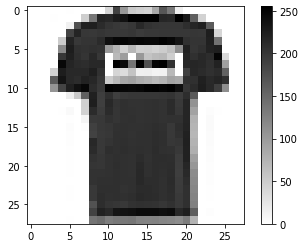

In [181]:
plt.figure('initial_inspection')
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


misc data analysis

In [182]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Pre process images for neural network processing

In [183]:
# scale everyting to between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

look at the first 10 preprocessed images

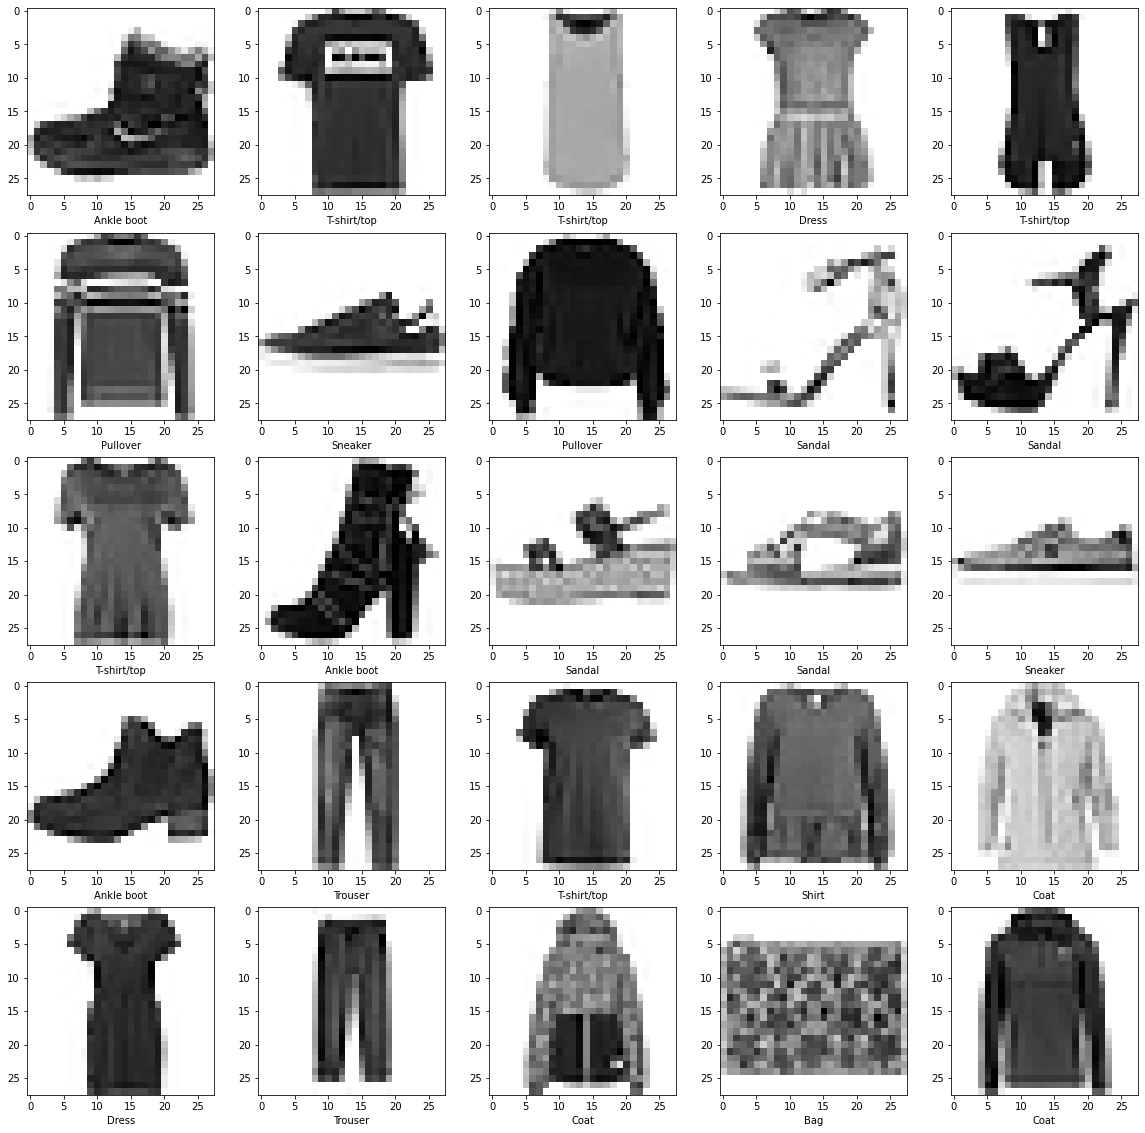

In [184]:
plt.figure('firstCouple', figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)
    # plt.xticks([])
    # plt.yticks([])
plt.show()

Build model

In [185]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(
    optimizer=tf.keras.optimizers.Adam(), # 'adam', #
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'] # =[tf.keras.metrics.Accuracy()] #
    )

train model

In [186]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4916 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3693 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3318 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3105 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2916 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2772 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2641 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2543 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.2472 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

evaluate accuracy of trained model by running it against the test set

In [187]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3375 - accuracy: 0.8846


Append a softmax layer to the existing model to generate a probability model.

In [188]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Capture predictions on test set

In [189]:
predictions = probability_model.predict(test_images)

Manually inspect how prediction matched up with verified test data truth

In [190]:
predictions[0]
print("predicted: {}, actual: {}".format(np.argmax(predictions[0]), test_labels[0]))

predicted: 9, actual: 9


Generate utility methods for plotting prediction inputs and results.

In [191]:
def plot_image(i, predictions_array, true_labels, imgs):
    true_label, img = true_labels[i], imgs[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = "red"
    if(predicted_label == true_label):
        color = "blue"
    
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color = color)

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bar_plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim(0,1)
    predicted_label = np.argmax(predictions_array)

    bar_plot[predicted_label].set_color('red')
    bar_plot[true_label].set_color('blue')


looking at the results for test case 1

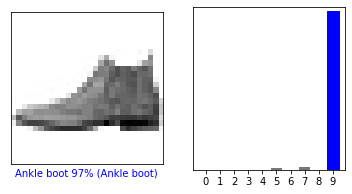

In [192]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

looking at another individual result

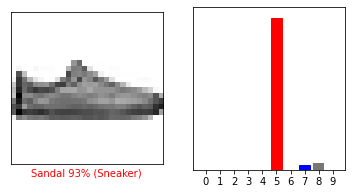

In [193]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

looking at the results from several test images

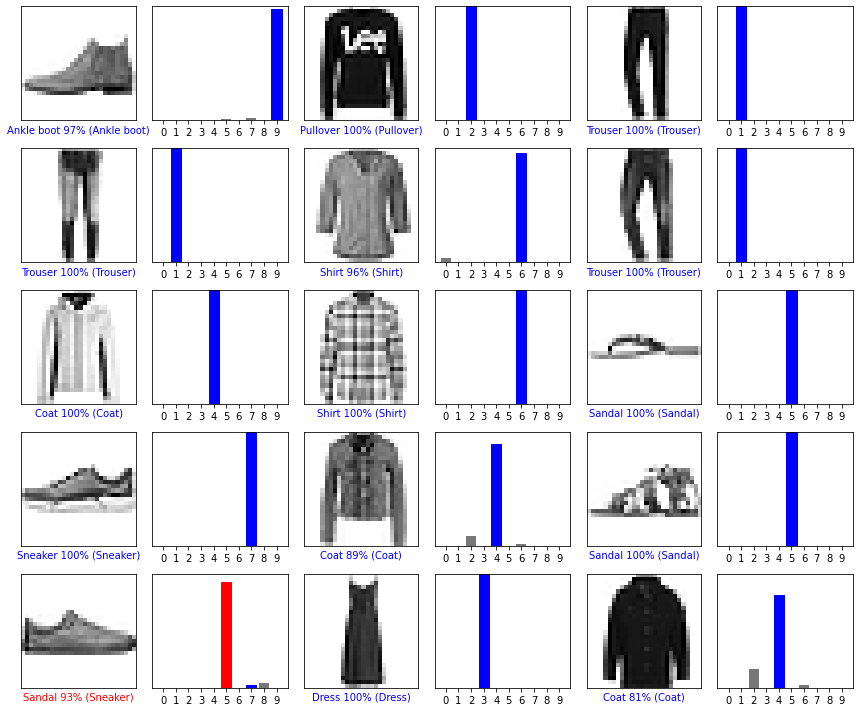

In [194]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure('multiple_results', figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2* num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
plt.show()


Then use the model on a single test image

In [195]:
img = test_images[1]
print(img.shape)

# put the image in its own list as required by keras
single_image_set = (np.expand_dims(img, 0))

print(single_image_set.shape)

(28, 28)
(1, 28, 28)


Then run the model on the single image set

[[1.0608616e-04 4.9003598e-18 9.9936360e-01 1.0357101e-09 4.9446116e-04
  4.4483748e-15 3.5892128e-05 1.2091464e-16 1.5460547e-10 1.7087146e-13]]


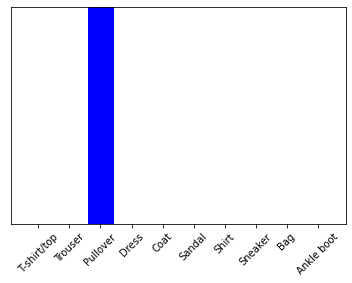

2


In [196]:
single_prediction = probability_model.predict(single_image_set)
print(single_prediction)

plt.figure()
plot_value_array(1, single_prediction[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

print(np.argmax(single_prediction[0]))

Lets try this with a raw image from the web

Affine Tranformation stuff: https://stackoverflow.com/questions/37584977/translate-image-using-pil


(1024, 1024)


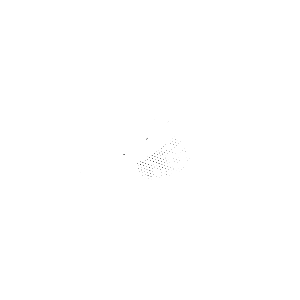

In [211]:
import PIL
from PIL import Image, ImageOps, ImageEnhance

raw_image = Image.open("./rawWildShoe.jpg")
print(raw_image.size)
cropped_image = raw_image.crop((10, 10, 1000, 1000))
resized_image = cropped_image.resize((300, 300))
# resized_image.show()
shifted_image = resized_image.transform(resized_image.size, PIL.Image.AFFINE, (1, 0,0,0,1, 50), fillcolor = 'white')
# shifted_image.show()
gray_image = ImageOps.grayscale(shifted_image)
light_gray_image = ImageEnhance.Brightness(gray_image).enhance(1.5)
light_gray_image.show()
small_gray_image = light_gray_image.resize((28,28))
small_gray_image.show()


Continue formatting the image into something the model can use.

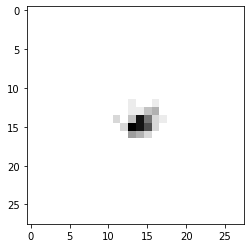

784


In [212]:
numpy_grey = np.array(small_gray_image)
numpy_grey = np.reshape(numpy_grey, (28,28))

plt.figure()
plt.imshow(numpy_grey)
plt.show()

print(numpy_grey.size)

Next take that image and run it through the model

784


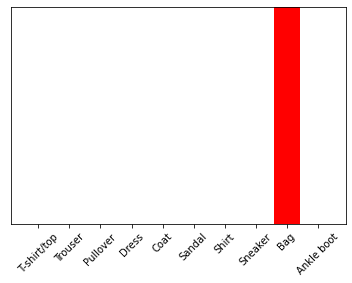

8
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [213]:
np_grey_set = (np.expand_dims(numpy_grey, 0))
print(np_grey_set.size)

wild_predict = probability_model.predict(np_grey_set)

plt.figure()
plot_value_array(0, wild_predict[0], [7])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

print(np.argmax(wild_predict[0]))
print(wild_predict)